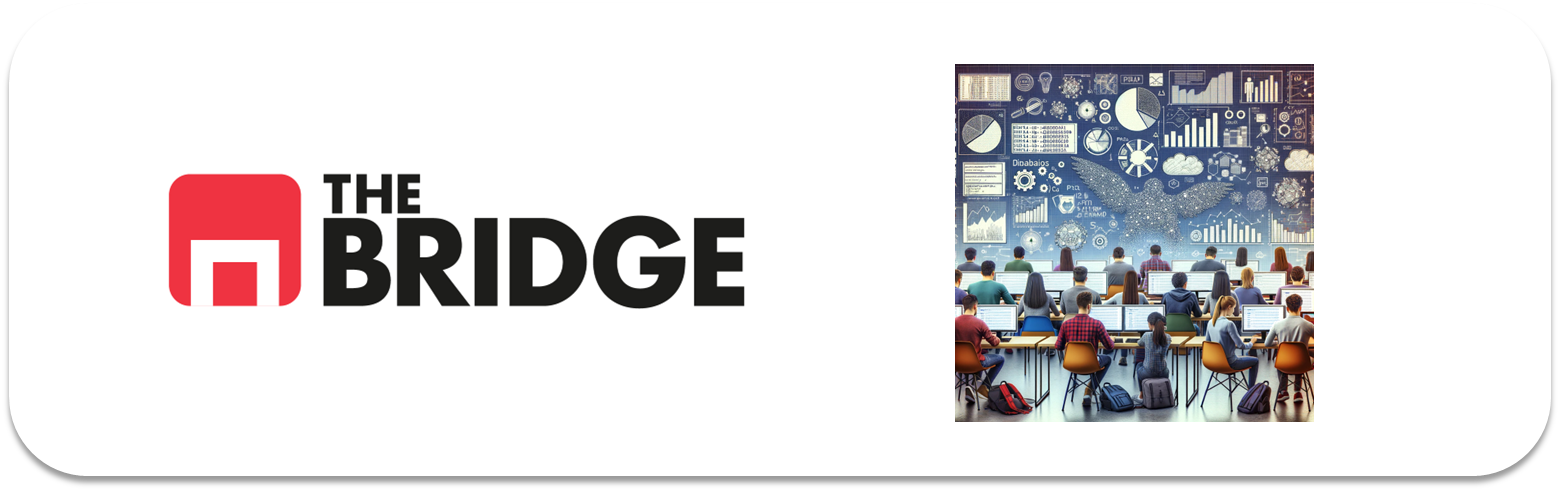

## PRACTICA OBLIGATORIA: **Regresion Lineal y Regularización**

* La práctica obligatoria de esta unidad consiste en hacer un modelado completo de un problema que ya conoces, la predicción de casas, pero con otro dataset. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Modelo de Regresión Lineal

El objetivo del modelo que tienes que construir es predecir la mediana del precio de las casas en una zona del área metropolitana de Boston dadas las características de las mismas. Sí, es parecido pero no igual a lo que hemos venido haciendo.

Aquí tienes una descripción de las variables del dataset, del que tendrás que decidir el target:  

***CRIM:*** Tasa de criminalidad per cápita por ciudad  
***ZN:*** Proporción de terreno residencial destinado a lotes de más de 25,000 pies cuadrados  
***INDUS:*** Proporción de acres de negocios no minoristas por ciudad  
***CHAS:*** Variable ficticia del río Charles (= 1 si el sector limita con el río; 0 en caso contrario)  
***NOX:*** Concentración de óxidos de nitrógeno (partes por 10 millones)  
***RM:*** Número promedio de habitaciones por vivienda  
***AGE:*** Proporción de unidades ocupadas por el propietario construidas antes de 1940  
***DIS:*** Distancias ponderadas a cinco centros de empleo de Boston  
***RAD:*** Índice de accesibilidad a autopistas radiales  
***TAX:*** Tasa de impuesto sobre la propiedad de valor total por $10,000  
***PTRATIO:*** Relación alumno-maestro por ciudad  
***LSTAT:*** % de población de estatus socioeconómico bajo  
***MEDV:*** Valor medio de las viviendas ocupadas por sus propietarios en miles de dólares  

### Indicaciones

A continuación tienes las indicaciones para hacer el modelado. No necesariamente tienes que seguirlos al pie de la letra, porque a partir de ahora ya las práctica obligatorias dejarán de ser mayormente guiadas por ejercicios y serán más de libre desarrollo, aunque con objetivos específicos, claros y determinados. 

En concreto se pide hacer un modelo de regresión lineal, evaluarlo contra un dataset de test reservado del original mostrando MAE,RMSE,MSE y $R2$, comparar las predicciones con los valores reales y realizar al menos un tipo de regularización de las conocidas, testando por lo menos 3 valores diferentes de hiperparámetros.

Los pasos para guiar el trabajo:
1. Carga el dataset. Está limpio y no necesitarás completar nulos, ni repasar los valores de las columnas.
2. Escoge y analiza la variable target de forma gráfica para ver la idoneidad de hacer un modelo de regresión.
3. Haz el split en train y test que creas conveniente y de la forma que creas conveniente.
4. Construye las parejas X,y de train y test
5. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.
6. Trata las variables para que funcionen lo mejor posible en el modelo.
7. Construye un modelo de regresión lineal.
8. Analiza si lo crees conveniente los pesos y la importancia de las features.
8. Evalúa tu modelo. Haz un pequeño assesmente de su generabilidad. Compara gráficamente las predicciones con los valores reales.
9. Regulariza al menos con un modelo alternativo y juega con 3 posibles valores de los hiperparámetros del modelo de regularización.
10. Expresa tus conclusiones, en concreto ¿con qué modelo te quedarías?¿por qué?



In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [80]:

df = pd.read_csv("data/hard_to_find/obligatoria_hard.csv", sep = "|")
df.head(20)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,17.10,18.9


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


-Cardinalidad de las columnas

In [82]:
def cardinalidad (tabla):
    columnas = tabla.columns
    for columna in columnas:
        print(f"La cardinalidad de {columna} es =", tabla[columna].nunique()/len(tabla) * 100, "%")

cardinalidad(df)

La cardinalidad de CRIM es = 99.60474308300395 %
La cardinalidad de ZN es = 5.138339920948617 %
La cardinalidad de INDUS es = 15.019762845849801 %
La cardinalidad de CHAS es = 0.3952569169960474 %
La cardinalidad de NOX es = 16.007905138339922 %
La cardinalidad de RM es = 88.14229249011858 %
La cardinalidad de AGE es = 70.35573122529645 %
La cardinalidad de DIS es = 81.42292490118577 %
La cardinalidad de RAD es = 1.7786561264822136 %
La cardinalidad de TAX es = 13.043478260869565 %
La cardinalidad de PTRATIO es = 9.090909090909092 %
La cardinalidad de LSTAT es = 89.9209486166008 %
La cardinalidad de MEDV es = 45.25691699604743 %


- Visualizacion TARGET

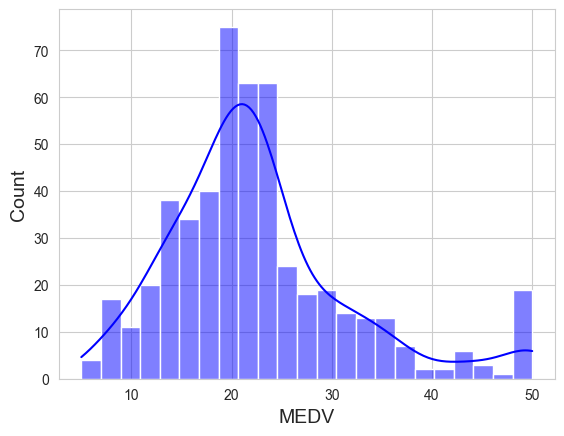

In [83]:
sns.histplot(df['MEDV'], color='Blue', kde = True)
plt.show()

- Division ENTRENAMIENTO - TEST

In [84]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size = 0.2, random_state = 42)

- CORRELACIONES FEATURES

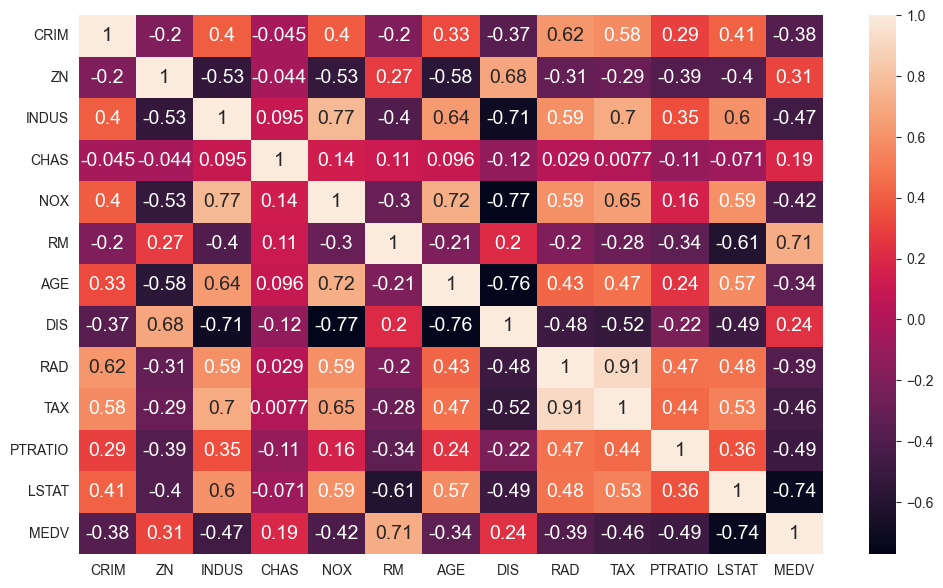

In [85]:
plt.figure(figsize=(12,7))
sns.heatmap(train_set.corr(numeric_only = True),annot=True);
plt.show();

In [86]:
features = ["CRIM", "INDUS","NOX", "RM", "DIS", "RAD", "TAX", "PTRATIO", "LSTAT"]

target = "MEDV"

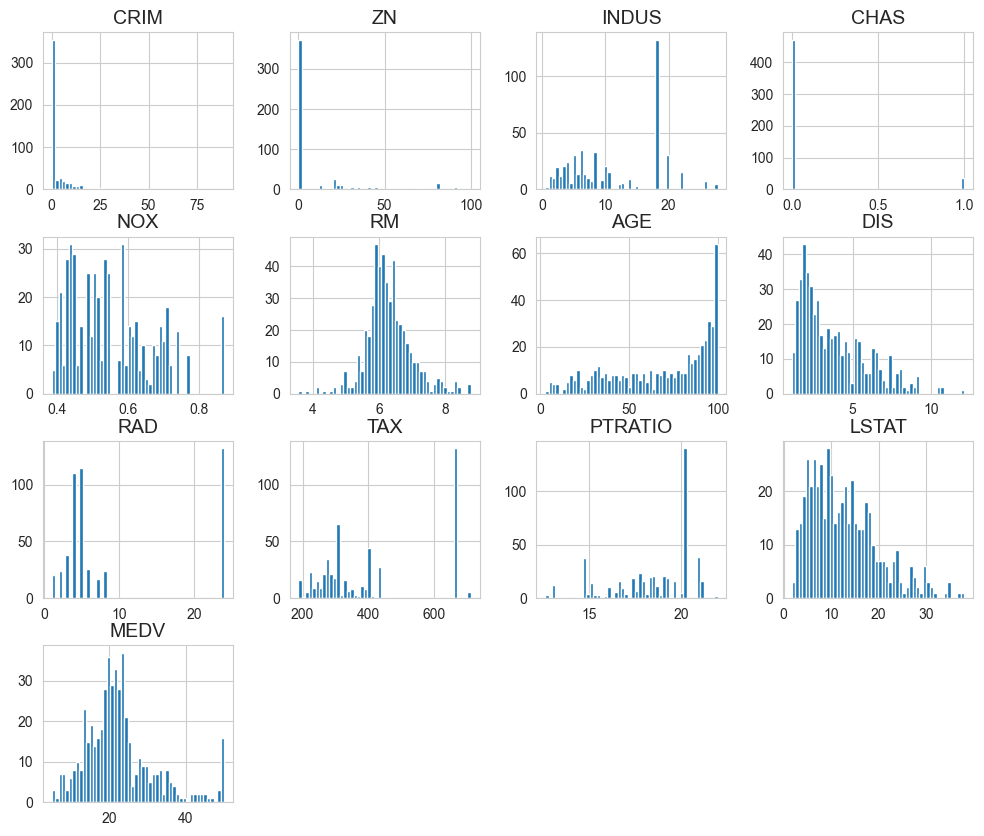

In [87]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

df.hist(bins=50, figsize=(12, 10)) # La forma de generar histogramas de una sola vez para las variables numéricas de un dataset
plt.show()

In [88]:
features = ["RM", "CRIM", "INDUS","NOX","AGE", "DIS", "RAD", "TAX", "PTRATIO", "LSTAT"]


- SE aplica logaritmo a las variables para obtener forma gaussiana de la curva
- SE escalan los datos con la estandarizacion

In [90]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
for col in features:
    
    train_set[col] = std_scaler.fit_transform(train_set[[col]])



In [91]:
for col in features:
    
    test_set[col] = std_scaler.fit_transform(test_set[[col]])



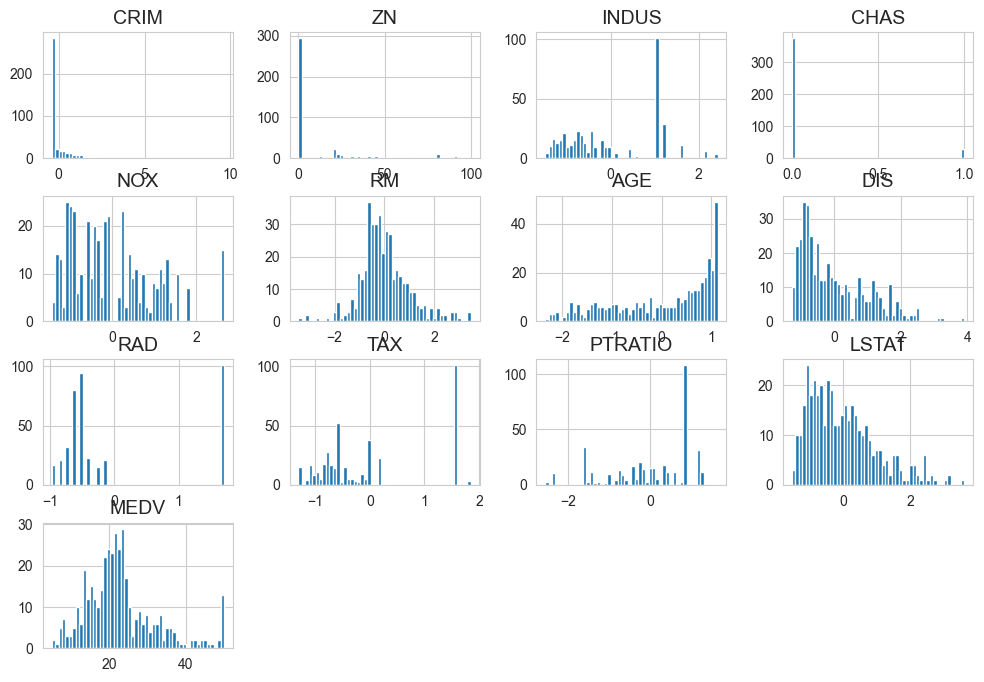

In [92]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

train_set.hist(bins=50, figsize=(12, 8)) # La forma de generar histogramas de una sola vez para las variables numéricas de un dataset
plt.show()

- Regresion linear / entrenamiento

In [96]:
X_train = train_set[["CRIM", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO","LSTAT"]]
y_train = train_set[target]

X_test = test_set[["CRIM", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO","LSTAT"]]
y_test = test_set[target]

In [97]:
from sklearn.linear_model import LinearRegression


lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

- Analisis de los pesos

In [98]:
coef_df = pd.DataFrame(lin_reg.coef_, X_train.columns, 
                      columns=['Coefficient']).sort_values('Coefficient', ascending=False )
coef_df

,Coefficient
RM,3.103203
RAD,2.014539
AGE,-0.128995
CRIM,-1.148874
TAX,-1.597862
NOX,-2.014731
PTRATIO,-2.269926
DIS,-2.784257
LSTAT,-3.897156


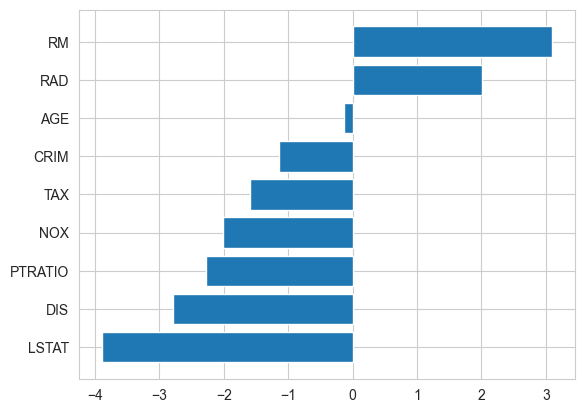

In [99]:
feat = coef_df.sort_values('Coefficient')
plt.barh(feat.index,feat.Coefficient)
plt.show()

- testeo

In [104]:
X_test.describe()

,CRIM,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
count,1.020000e+02,1.020000e+02,1.020000e+02,1.020000e+02,1.020000e+02,1.020000e+02,1.020000e+02,1.020000e+02,1.020000e+02
mean,4.027280e-17,-1.523836e-17,-1.842480e-15,-2.829980e-16,1.980986e-16,-6.857260e-17,1.014983e-16,-6.770184e-16,2.971479e-16
std,1.004938e+00,1.004938e+00,1.004938e+00,1.004938e+00,1.004938e+00,1.004938e+00,1.004938e+00,1.004938e+00,1.004938e+00
min,-4.883000e-01,-1.439907e+00,-3.935782e+00,-2.172189e+00,-1.286366e+00,-1.021593e+00,-1.341478e+00,-3.348173e+00,-1.463204e+00
25%,-4.773815e-01,-9.194048e-01,-4.399023e-01,-8.643128e-01,-7.391788e-01,-6.925324e-01,-8.105885e-01,-3.343249e-01,-7.963289e-01
50%,-4.608763e-01,-1.444344e-01,1.463398e-02,2.105111e-01,-1.946900e-01,-5.828456e-01,-4.524150e-01,1.121712e-01,-1.516487e-01
75%,1.201040e-01,6.837430e-01,4.820381e-01,9.244516e-01,5.107164e-01,1.501204e+00,1.365351e+00,6.702913e-01,6.366021e-01
max,5.673641e+00,2.992461e+00,2.835711e+00,1.090545e+00,3.482165e+00,1.501204e+00,1.620178e+00,1.674907e+00,3.266994e+00


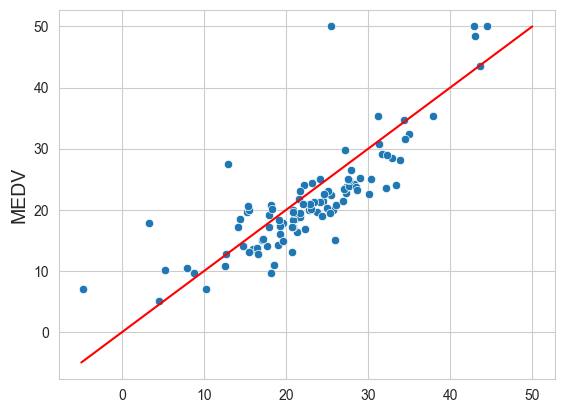

In [106]:
predictions = lin_reg.predict(X_test)
predictions

sns.scatterplot(x=predictions,y=y_test);
plt.plot([-5,50],[-5,50],'red')
plt.show()

- Train error

In [101]:
from sklearn import metrics

pred_train = lin_reg.predict(X_train)
print('MAE train', metrics.mean_absolute_error(y_train, pred_train))
print('MSE train', metrics.mean_squared_error(y_train, pred_train))
print('RMSE train', np.sqrt(metrics.mean_squared_error(y_train, pred_train)))
print('R2 train', lin_reg.score(X_train,y_train))

MAE train 3.4845438053781796
MSE train 23.41812280903605
RMSE train 4.839227501268777
R2 train 0.7304339213637234


- Test error

In [102]:
pred_test = lin_reg.predict(X_test)
print('MAE train', metrics.mean_absolute_error(y_test, pred_test))
print('MSE train', metrics.mean_squared_error(y_test, pred_test))
print('RMSE train', np.sqrt(metrics.mean_squared_error(y_test, pred_test)))
print('R2 train', lin_reg.score(X_test,y_test))

MAE train 3.9154679964803343
MSE train 27.02599543941388
RMSE train 5.198653233233958
R2 train 0.6314659591428767
